# Grundlagen 

Dieses Notebook benötigt das Jupyter-SageMath-9.0-Kernel \
Eine Installationsanleitung finden Sie im Textdokument "Einführung" innerhalb des Projektanhangs

Ziel dieses Notebooks ist die Erläuterung der absoluten Grundlagen des Supersingular Isogeny Diffie Hellman.

## Elliptische Kurven

Elliptische Kurven sind spezielle mathematische Kurven, die neben ihrer geometrischen Betrachtung auch mittels algebraischer Methoden untersucht werden können. \
Eine elliptische Kurve kann durch folgende Gleichung beschrieben werden:  
$$y^2 = x^3 + ax + b \ ; \ a, b \in \mathbb{K}$$

Eine beispielhafte, über den reellen Zahlen definierte elliptische Kurve: $$y^2 = x^3 - 5x + 10$$

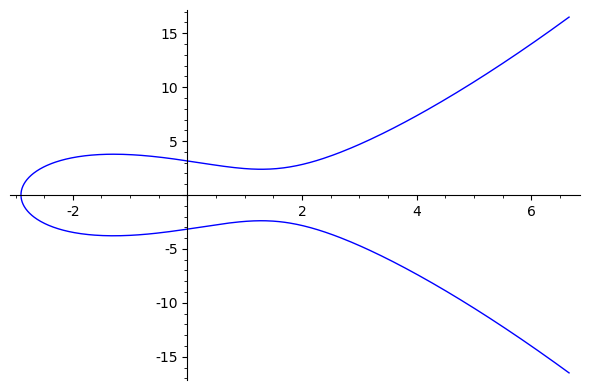

In [1]:
E = EllipticCurve([-5, 10])
E.plot()

Zahlenpaare $(x, y)$ welche die Kurvengleichung von $E$ erfüllen, nennt man Punkte der elliptischen Kurve. Deren Menge nennt man Punktmenge von $E$.

Die Besonderheit an elliptischen Kurven ergibt sich aus den Eigenschaften ihrer Punktmenge. 
Diese kann nicht nur geometrisch (als Kurve/Graph), sondern auch algebraisch aufgefasst werden. Die Punktmenge jeder elliptischen Kurve repräsentiert eine algebraische Gruppe $G$. 

***

Eine Gruppe besteht immer aus einer Menge von Objekten und aus einer zweistelligen Operation bezüglich _G_: $ \ G = (M, *)$. Im Falle der elliptischen Kurve ist die Menge der Gruppe die Punktmenge der elliptischen Kurve _E_ und die Operation wird durch die sogenannte Punktaddition repräsentiert. Für die Gruppe _G_ müssen folgende Eigenschaften gelten _[1]_:
1. Abgeschlossenheit: $ \ a, b, c \in M_G \ ; \ a * b = c$
2. Assoziativität: $ \ a, b, c \in M_G \ ; \ (a*b)*c = a*(b*c)$
3. Es existiert ein neutrales Element: $ \ a, e \in M_G ; \ a * e = a$
4. Zu jedem Element existiert eine Inverse: $ \ a, e \in M_G \ ; \ a * a^{-1} = e$
5. Um zusätzlich als abelsche Gruppe bezeichnet zu werden muss die Operation kommutativ sein: $ \ a, b \in M_G \ ; \ a * b = b * a$

***

Die Gruppenoperation einer elliptschen Kurve wird als Punktaddition ($\oplus$) bezeichnet.
Diese kann vorzugsweise graphisch veranschaulicht werden.
Dabei ist das Ergebnis der Gleichung: $A \oplus B \ ; \ A, B \in E$ der dritte Schnittpunkt der Geraden durch die Punkte $A$ und $B$ mit der Kurve $E$ _[3]_

Mithilfe dieser Grundlage kann zusätzlich noch eine weitere Operation definiert werden:
Die Multiplikation eines Skalars $k$ mit einem Punkt $A$ auf der elliptischen Kurve $E$.
Dabei ist das Ergebnis der Gleichung $[k] A \ ; \ A \in E$ der Schnittpunkt der Tangente von $A$ an $E$ mit der Kurve $E$ _[3]_.
Es ist dabei darauf zu achten, dass die Skalarmultiplikation lediglich eine wiederholte Punktaddition notiert und direkt aus dieser hergeleitet werden kann

Mithilfe einfacher Beweismittel kann gezeigt werden, dass die Gruppe $E(M_{Punktmenge}, \oplus)$ die oben genannten Gruppengesetze erfüllt (siehe _[2]_).

Elliptische Kurven sind in der modernen Mathematik unverzichtbar. So stellen elliptische Kurven zum Beispiel die Grundlage für den berühmten Beweis des Großen Fermatschen Satzes durch den britischen Mathematiker Andrew Wiles dar.
Wie im Weiteren besprochen ist das größte Anwendungsgebiet elliptischer Kurven zweifelsfrei die Kryptographie, wobei heutzutage jeder internetfähige Rechner die oben genannten Berechnungen mehrere Milliarden mal am Tag durchführt

## Elliptische Kurven über endlichen Feldern

Die in den oben gezeigten Abbildungen verwendeten elliptischen Kurven sind alle über den reelen Zahlen definiert. Die Punktmenge solcher elliptischer Kurven ist daher unendlich (sogar überabzählbar) groß. Für zahlentheoretische und kryptographische Anwendungen werden jedoch elliptische Kurven mit einer endlichen Menge an Punkten benötigt. Daher definiert man elliptische Kurven oftmals über endlichen Feldern. Die elliptische Kurve $E: y^2 = x^3 - 3x + 7$ über dem endlichen Feld $GF(13)$ sieht wie folgt aus:

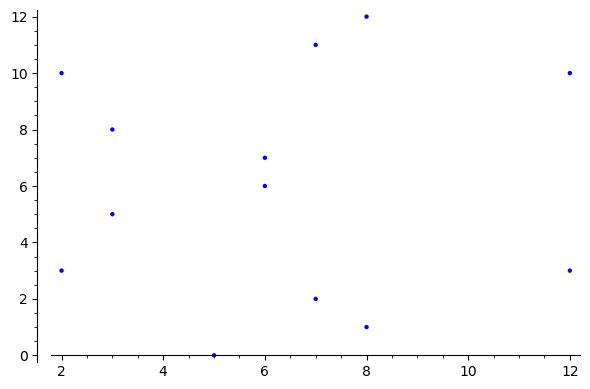

In [2]:
E = EllipticCurve(GF(13), [-3, 7])
E.plot()

Wenn im Folgenden über elliptische Kurven gesprochen wird, bezieht sich dies stets auf elliptische Kurven über endlichen Feldern

## Der Generator

Auf jeder elliptischen Kurve $E$ existiert zudem ein Punkt $g \in E$, der mithilfe der Skalarmultiplikation jeden anderen Punkt auf der Kurve "generiert". Dieser Punkt wird Generator oder Generatorpunkt genannt.

In [3]:
E = EllipticCurve(GF(7), [5, 1])
generator_point = E.gens()[0]

print("Generator: " + str(generator_point))

all_points_on_E = [point for point in E]
print("Alle Punkte auf E: " + str(all_points_on_E))

print("Die Sklaramultiplikation auf den Generator mit unterschiedlichen Skalaren: ")
for i in range(E.order()):
    print("["+str(i)+"]"+str(generator_point) + " generiert den Punkt " + str(i*generator_point))

Generator: (6 : 4 : 1)
Alle Punkte auf E: [(0 : 1 : 0), (0 : 1 : 1), (0 : 6 : 1), (1 : 0 : 1), (3 : 1 : 1), (3 : 6 : 1), (4 : 1 : 1), (4 : 6 : 1), (5 : 2 : 1), (5 : 5 : 1), (6 : 3 : 1), (6 : 4 : 1)]
Die Sklaramultiplikation auf den Generator mit unterschiedlichen Skalaren: 
[0](6 : 4 : 1) generiert den Punkt (0 : 1 : 0)
[1](6 : 4 : 1) generiert den Punkt (6 : 4 : 1)
[2](6 : 4 : 1) generiert den Punkt (3 : 6 : 1)
[3](6 : 4 : 1) generiert den Punkt (0 : 6 : 1)
[4](6 : 4 : 1) generiert den Punkt (5 : 5 : 1)
[5](6 : 4 : 1) generiert den Punkt (4 : 1 : 1)
[6](6 : 4 : 1) generiert den Punkt (1 : 0 : 1)
[7](6 : 4 : 1) generiert den Punkt (4 : 6 : 1)
[8](6 : 4 : 1) generiert den Punkt (5 : 2 : 1)
[9](6 : 4 : 1) generiert den Punkt (0 : 1 : 1)
[10](6 : 4 : 1) generiert den Punkt (3 : 1 : 1)
[11](6 : 4 : 1) generiert den Punkt (6 : 3 : 1)


## Elliptische Kurven in der asymetrischen Kryptographie

Elliptische Kurven und deren Eigenschaften werden exzessiv für kryptographische Anwendungen benutzt. So basiert der asymetrische Teil aller herkömmlichen TLS-Verschlüsselungen auf elliptschen Kurven _[4]_. Auch WhatsApp, Facebook, SSH und Giropay verwenden beispielsweise elliptische Kurven als Schlüsselverteilungsalgorithmus. Der Ablauf ist dabei wie folgt:

***

Zunächst einigen sich Alice und Bob auf eine elliptische Kurve $E$ und deren Generatorpunkt $g$

(6 : 4 : 1)


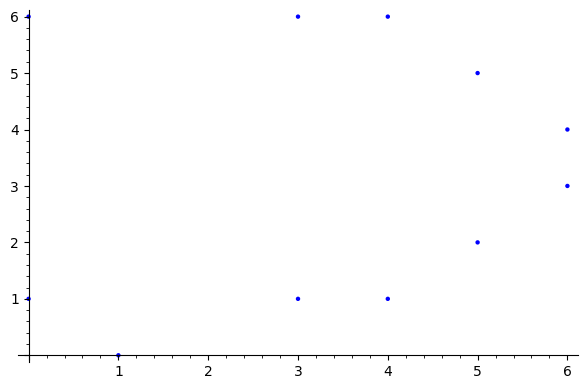

In [4]:
E = EllipticCurve(GF(7), [5, 1])
generator_point = E.gens()[0]

print(generator_point)
E.plot()

Dann generiert sowohl Alice als auch Bob eine zufällige Zahl $k$

In [5]:
import random

k_Alice = randint(1, E.order())
print(k_Alice)

k_Bob = randint(1, E.order())
print(k_Bob)

6
1


Mithilfe dieser Zahl $k$ berechnen Alice und Bob jeweils einen Punkt $P$ auf der elliptischen Kurve, wobei $$P = [k]g$$

In [6]:
P_Alice = generator_point * k_Alice
print(P_Alice)

P_Bob = generator_point * k_Bob
print(P_Bob)

(1 : 0 : 1)
(6 : 4 : 1)


Nun übermitteln beide ihren Punkt $P$ an die jeweils andere Partei, sodass Alice und Bob danach sowohl $P_A$ als auch $P_B$ halten.
Schließlich berechnen sie nun damit ihr gemeinsames Geheimnis $S$, wobei 
1. Alice: $$\ S = k_A * P_B$$
1. Bob: $$\ S = k_B * P_A$$

In [7]:
S_Alice = k_Alice * P_Bob
print(S_Alice)

S_Bob = k_Bob * P_Alice
print(S_Bob)

(1 : 0 : 1)
(1 : 0 : 1)


In [8]:
S_Alice == S_Bob

True

Beide erhalten durch diese Berechnung immer denselben Punkt und können diesen nun z.B. zur Herleitung eines symetrischen Schlüssels nutzen

In [9]:
import hashlib

symmetric_key_Alice = hashlib.sha256(str.encode(str(S_Alice))).hexdigest()
symmetric_key_Bob = hashlib.sha256(str.encode(str(S_Bob))).hexdigest()

print(symmetric_key_Alice)
print(symmetric_key_Bob)
print(symmetric_key_Alice == symmetric_key_Bob)

d2468be8d744bfe3dd8099b828778d32b36c17b5406b0a78e69341f748bf6672
d2468be8d744bfe3dd8099b828778d32b36c17b5406b0a78e69341f748bf6672
True


Selbstverständlich sind die in diesem Beispiel verwendeten Parameter viel zu niedrig gewählt, um eine kryptographische Sicherheit zu gewährleisten. Ein reales Beispiel würde wie folgt aussehen:

In [10]:
import hashlib

K = GF(0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f)
E = EllipticCurve(K, [0, 7])
generator_point = E.gens()[0]

print("***************************************")
print(K)
print(E)
print(generator_point)

print("***************************************")
k_Alice = randint(1, E.order())
print(k_Alice)

k_Bob = randint(1, E.order())
print(k_Bob)

print("***************************************")
P_Alice = generator_point * k_Alice
print(P_Alice)

P_Bob = generator_point * k_Bob
print(P_Bob)

print("***************************************")
S_Alice = k_Alice * P_Bob
print(S_Alice)

S_Bob = k_Bob * P_Alice
print(S_Bob)

print(S_Alice == S_Bob)

print("***************************************")
symmetric_key_Alice = hashlib.sha256(str.encode(str(S_Alice))).hexdigest()
print(symmetric_key_Alice)

symmetric_key_Bob = hashlib.sha256(str.encode(str(S_Bob))).hexdigest()
print(symmetric_key_Bob)

print(symmetric_key_Alice == symmetric_key_Bob)

***************************************
Finite Field of size 115792089237316195423570985008687907853269984665640564039457584007908834671663
Elliptic Curve defined by y^2 = x^3 + 7 over Finite Field of size 115792089237316195423570985008687907853269984665640564039457584007908834671663
(78696708153184819567544810616103055619645698255331501928390144358423314934016 : 98197484079477709298865125717672581729054831664614472341666166473053965684281 : 1)
***************************************
42956184598832547792949270197027374667270579501835603623613540984994606618267
47692210690214431202537199854715086077584216781677078706738465564234285081721
***************************************
(38295126938078941939976222689116143927950187545104350356450481690684232840859 : 80982991530678690881206303256208595697922177426248038727863566703100242377420 : 1)
(44020634773345752709749907823136109644309741515504242932025317738699769307487 : 5603983695496290542088831805888117172266648906557915986748097938525458

## Elliptische Kurven im Projektiven Raum

Wenn Sie das obige Beispiel aufmerksam ausgeführt haben, sollte Ihnen aufgefallen sein, dass die Punkte der elliptschen Kurve nicht in der $x,y$ Koordinatenform: $P = (x_P, y_P)$ dargestellt werden.
SageMath verwendet zur Darstellung von Punkten die mathematisch und algorithmisch effizientere Darstellungsform der Projektivkoordinaten. Dabei besitzt jeder Punkt nicht zwei sondern drei Variablen _[3]_: $$P_{Projektiv} = (x : y : z)$$

Um dies zu verstehen müssen wir den Projektiven Raum $\mathbb{P}$ betrachten

Der projektive Raum $\mathcal{P}^3$ besitzt 3 Dimensionen.
Der Kern dieses Raumes besteht dabei aus seiner sog. Äquvivalenzrelation $\sim$, wobei alle Punkte $P = (x : y : z)$, die auf derselben Geraden durch den Ursprung $(0 : 0: 0)$ liegen, äquivalent zueinander sind _[1]_:
$$P_1 = (x : y : z) \ ; \ P_2 = (a*x : a*y : a*z) \ ; \ P_1 \sim P_2$$ 

Um affine elliptische Kurven in Weierstraßform in ihre Projektivfrom umzuwandeln, muss die Gleichung entsprechend angepasst werden
$$E_{Affin}: y^2 = x^3 + ax + b \rightarrow E_{Projektiv}: y^2z = x^3 + axz^2 + bz^3$$
Wenn wir nun $z = 1$ setzen erhalten wir wieder die affine Weierstraßform: $$z = 1$$ $$[y^21 = x^3 + ax1^2 + b1^3] \rightarrow [y^2 = x^3 + ax + b]$$ 
Genau diese Methode wurde auch bei den Punkten im obigen kryptographischen Beispiel angewandt. 
So können auch alle bisher bekannten Punkte in affiner Form in Projektivform umgewandelt werden: $P_{Affin} = (x, y) \rightarrow P_{Projektiv} = (x : y : 1)$ 
Ein Vorteil der projektiven Form ist, dass der Punkt im Unendlichen darstellbar wird. Stellen wir dazu die Frage, welche Punkte durch die projektive Form nicht darstellbar sind. Dies sind alle Punkte, die auf der Geraden $x = 1$ liegen, da diese niemals einen Schnittpunkt mit einer der Äquivalenzgeraden besitzen _[3]_. 
Daher wird der Punkt im Unendlichen mit $\mathcal{O} = (0 : 1 : 0)$ notiert

Die Projektivform wird zumeist in der Praxis gewählt, da mit ihr deutlich effizienter gerechnet werden kann. Dazu ein kurzes Bespiel:

Die Formel zur Punktdopplung (Skalarmultiplikation mit $k=2$) eines Punktes $P_1 = (x_1, y_1)$ in affiner Form _[1]_ :$$\lambda = \frac{3x_1^2+a}{2y_1}$$ </br> $$x_2=\lambda^2 - 2x_1$$ $$y_2 = \lambda(x_1-x_2) - y_1$$

In [11]:
def point_doubling_affine(x_1, y_1, a):
    lambda_ = ((3 * x_1) + a) / (2 * y_1)
    x_2 = (lambda_ ** 2) - 2 * x
    return (x_2, lambda_ * (x_1 - x_2) - y_1)

K.<i> = GF(7)
E = EllipticCurve(K, [5, 1])

random_point = E.random_point()
x = random_point[0]
y = random_point[1]

point_doubling_affine(x, y, 5)

(3, 3)

Die Formel zur Punktdopplung eines Punktes $P_1 = (x : y : z)$ in projektiver Form:
$$\lambda = az^2 + 3x^2 $$ $$\sigma = yz$$ $$\rho = xy\sigma$$ $$\psi = \lambda^2 - 8\rho$$
$$x_2 = 2\psi\sigma$$ $$y_2 = \lambda(4\rho-\psi)-8y_1^2\sigma^2$$ $$z_2 = 8\sigma^3$$


In [12]:
K.<i> = GF(7)
E = EllipticCurve(K, [5, 1])

random_point = E.random_point()

print(random_point)
print(random_point * 2)

(6 : 4 : 1)
(3 : 6 : 1)


Auf den ersten Blick scheint die Formel zur Punktdopplung mit affinen Koordinaten simpler zu sein. Das soll jedoch nicht darüber hinwegtäuschen, dass die zweite Formel mit projektiven Koordinaten um Magnituden schneller ist. Dies ist in der Division begründet, wobei die erste, affine Formel stets $(2y_1)^{-1}$ berechnen muss. Die Inversion eines Elementes eines endlichen Felds über diesem Feld ist äußerst kostspielig (in Bezug auf Rechenzeit) und muss daher in der Praxis mit allen Mittel vermieden werden. Die zweite projektive Formel benötigt dabei keine Inversion. 
Dies ist die Begründung warum in der Praxis zumeist projektive Koordinaten verwendet werden.

Die folgende Tabelle listet die Anzahl der nötigen Operationen für den jeweiligen Algorithmus _[3]_

| Typ       | Addition | Subtraktion | Multiplikation | Inversion |
|-----------|----------|-------------|----------------|-----------|
| Affin     | 1        | 3           | 6              | 1         |
| Projektiv | 1        | 3           | 19             | 0         |

## Montgomery Kurven

Wie bereits erwähnt stellen elliptische Kurven eine unverzichtbare Grundlage der modernen Kryptographie dar. Daher wird seit deren Entdeckung für die Kryptographie stetig an Optimierungen geforscht. Die wohl wichtigste und meistbenutzte Optimierung wird nun im Folgenden besprochen.

Elliptische Kurven können durch mehrere Formen dargestellt werden. Die wohl einfachste Form wird als Weierstraßform bezeichnet und wurde bis jetzt auch in diesem Notebook durchgehend verwendet: $$E_{Weierstrass}: y^2 = x^2 + ax + b \ ; \ a, b \in \mathbb{K}$$ 
Elliptische Kurven können jedoch auch mittels der sogenannten Montgomeryform dargestellt werden: $$E_{Montgomery}: By^2 = x^3 + Ax^2 + x \ ; \ A, B \in \mathbb{K}$$

Jede Montgomerykurve mit $B \neq 0$ kann auch wieder in eine Weierstraßform gebracht werden. Daraus folgt, dass die Montgomeryform lediglich eine weitere (jedoch besondere) Darstellungsweise einer elliptischen Kurve ist. Die Formeln zur Transformation lauten dabei _[3]_: $$\psi:(y^2 = x^2 + ax + b) \rightarrow (By^2 = x^3 + Ax^2 + x)$$ $$\psi(A, B): (a = \frac{3 - A^2}{3B^2}) \ , \ (b = \frac{2A^3-9A}{27B^3})$$

Umgekehrt kann jedoch, aufgrund der besonderen Eigenschaften der Montgomerykurven, nicht jede Weierstrasskurve in eine Montgomerykurve umgewandelt werden. Auf die Bedingungen für eine solche Transformation wird hier verzichtet. In Referenz _[5]_ können die genauen Abbildungsvorschriften nachgelesen werden. 

Zusätzlich zu dieser veränderten Kurvengleichung wird auch eine neue Punktform eingeführt. Diese ist im Grunde eine projektive Punktform, wobei die $y$-Koordinate vernachlässigt wird. Die Montgomerykoordinatenform lautet daher: $P_{Montgomery} = (x : z)$, wobei die gleiche Transformation von affinen Koordinaten angewandt wird. Dabei gilt: $$(x, y) \rightarrow (x/z : z) \ ; \ z \neq 0$$

Dabei ist zu beachten, dass bei dieser Punktform die Information über die $y$ Koordinate verloren geht. Somit sind die affinen Punkte $P_1 = (x, y) \ ; \ P_2 = (x, -y)$ gemäß ihrer Montgomerypunktform äqvivalent. 
Die Punktdopplung kann somit auf Montgomeryform angepasst werden. Die explizite Formel zur Punktdopplung unter Verwendung einer Montgomerykurve mit dem Punkt $P_1 = (x_1 : z_1)$ in Montgomerypunktform lautet dabei: 
$$[2](x_1 : z_1) = [2]P_1 = P_2 = (x_2 : z_2)$$
$$x_2 = (x_1^2 - z_1)^2$$
$$z_2 = 4x_1(x_1^2 + Ax_1 + z_1)$$

Für diesen Punktdopplungsalgorithmus sind folgende Operationen nötig:

| Typ        | Addition | Subtraktion | Multiplikation | Inversion |
|------------|----------|-------------|----------------|-----------|
| Montgomery | 2        | 1           | 6              | 0         |

Der Zusammenschluss der Montgomerykurve und der Montgomerypunktform wird auch als Montgomeryarithmetik bezeichnet. Die Montgomeryarithmetik ist dabei die schnellste derzeit bekannte Form der Arithmeitk auf elliptischen Kurven. Die berühmte Montgomerykurve *Curve25519* wird zum Beispiel in den kryptographischen Systemen von WhatsApp, Tor, GPG und SSH verwendet

## Referenzen
_[1]_ Understanding Cryptography; Paar Christof, Pelzl Jan; 2010 Springer\
_[2]_ An Elementary Proof Of The Group Law For Elliptic Curve; Friedl Stefan; 2017 De Gruyter\
_[3]_ Elliptische Kurven in der Kryptographie; Werner Anette; 2002 Springer\
_[4]_ Elliptic Curve Cryptography (ECC) Cipher Suites for Transport Layer Security (TLS); Blake-Wilson S., Bolyard N.; 2006 The Internet Society\
_[5]_ Montgomery Curve; https://en.wikipedia.org/wiki/Montgomery_curve#Equivalence_with_Weierstrass_curves; 2021 The Wikipedia Foundation

***
&copy; 2021, Linus Meierhöfer